 <h1 align="center">Final_Project_Brain_Tumor_Classifier</h1>

 <h3 align="center">Authors: Noa Mansbach & Ido Shapira</h3>   

#### Project Overview and Objective:
- The main purpose of this project was to build models that would classify if a subject has a tumor or not based on an MRI scan. The model would try to learn the pattern of Brain Tumor in the MRI scans with different conditions such as - brain shape, size of the tumor etc.
- In addition, we would like to test whether we can, after training a model, develop an application that, given an image, will be able to classify whether a person has a brain tumor or not, so that it will be open for use by each doctor.

#### Data-Set Description:
The image data that was used for this problem is Brain MRI Images for Brain Tumor Detection from Kaggle web. It consists 253 MRI scans of two classes:
* NO - no tumor, encoded as 0 - 98 images
* YES - tumor, encoded as 1 - 155 images

#### Our Techniques: 
We will build a number of models based on different learning techniques some of which we learned in the course during the semester.
1. KNN model - finding a K-nearby neighbor.
2. SVM model - Support Vector Machine
3. Random Forest model - a forest of decision trees.
4. CNN model - a technique we learned in the "deep learning" course that we think will give good results on the database.


## Code:

### Import all the necessary libraries:
We have used Python libraries:
- sklearn
- tensorflow

In [32]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os
from tqdm import tqdm
import random as rn
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

# ! pip install split-folders
import splitfolders

import matplotlib.pyplot as plt
import seaborn as sns

## fix random seed:

In [2]:
rs = 42 # random seed
np.random.seed(rs)
rn.seed(rs)

In [3]:
tf.__version__

'2.3.1'

# Import the data:

Import the data:

In [4]:
X = []
Z = []
IMG_SIZE= 240

NO_DIR='./data/brain_tumor_dataset/no'
YES_DIR='./data/brain_tumor_dataset/yes'

In [5]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = plt.imread(path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        np_img=np.asarray(img)
        X.append(np_img)
        Z.append(str(label))

In [6]:
# make 'No' data
make_train_data('No',NO_DIR)
print(len(X))

100%|█████████████████████████████████████████████████████████████████████████████████| 98/98 [00:00<00:00, 249.37it/s]

98


In [7]:
# make 'Yes' data
make_train_data('Yes',YES_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 155/155 [00:00<00:00, 299.22it/s]

253


Description of the data:
1. Number of instances: 253
2. Number of attributes: 240*240

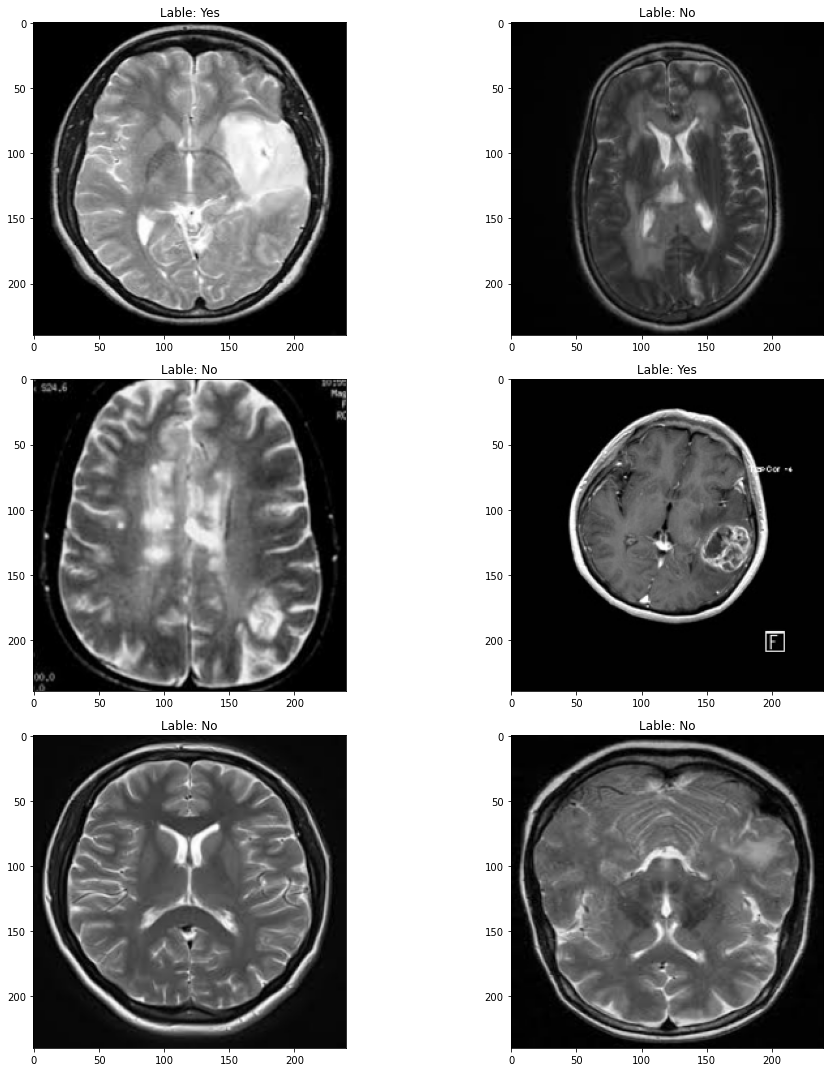

In [8]:
# check some image
fig,ax=plt.subplots(3,2)
fig.set_size_inches(15,15)
for i in range(3):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Lable: '+Z[l])
        
plt.tight_layout()

### Label encoding:

'No' = 0

'Yes' = 1

In [9]:
Y = np.array(Z)
Y = np.where(Y=='No', 0, Y)
Y = np.where(Y=='Yes', 1, Y)
Y = Y.astype('int32')

### Normalization and flatten the images:

We face up with dataset that contains both RGB and gray scale images, therefore we decided to convert all images to be gray scale.

In [10]:
for i in range(len(X)):
    if len(X[i].shape) == 3:
        X[i] = cv2.cvtColor(X[i], cv2.COLOR_BGR2GRAY)

now we can normalization and flatten the images

In [11]:
X = np.array([cv2.normalize(X[i], None, 0, 255, cv2.NORM_MINMAX) for i in range(len(X))]) # normalization
X=np.array(X)/255
# X = X.flatten().reshape(len(X), (IMG_SIZE ** 2) * 3) # 3 is because it is RGB image 
X = X.flatten().reshape(len(X), (IMG_SIZE ** 2))

### Our dataset:

In [12]:
df = pd.DataFrame(data=X)
df

,0,1,2,3,4,5,6,7,8,9,...,57590,57591,57592,57593,57594,57595,57596,57597,57598,57599
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.164706,0.090196,0.074510,0.094118,0.090196,0.082353,0.086275,0.082353,0.078431,0.078431,...,0.090196,0.090196,0.090196,0.090196,0.090196,0.090196,0.090196,0.090196,0.094118,0.156863
249,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
250,0.125490,0.309804,0.266667,0.250980,0.231373,0.223529,0.247059,0.247059,0.235294,0.227451,...,0.215686,0.215686,0.215686,0.215686,0.223529,0.227451,0.278431,0.215686,0.215686,0.203922
251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,0.000000,0.003922,...,0.803922,0.811765,0.784314,0.737255,0.129412,0.098039,0.094118,0.113725,0.117647,0.121569


### Train-Test Split:

In [13]:
# separate data
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=rs, shuffle=True)

freqs = pd.DataFrame({"Training dataset": [(y_train == 1).sum(),(y_train == 0).sum()],
                      "Test dataset": [(y_test == 1).sum(),(y_test == 0).sum()],
                      "Total": [(y_train == 1).sum()+(y_test == 1).sum(),(y_train == 0).sum()+(y_test == 0).sum()]},
                     index=["Free", "Full"])
freqs[["Training dataset", "Test dataset", "Total"]]

,Training dataset,Test dataset,Total
Free,124,31,155
Full,78,20,98


In [14]:
def statistics(confusion):
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    print('True Positives (TP):',TP)
    print('True Negatives (TN):',TN)
    print('False Positives (FP):',FP)
    print('False Negarives (FN):',FN)
    print('Classification Accuracy:',(TP + TN) / float(TP + TN + FP + FN))
    precision = TN / float(TN + FP)
    print('Precision:',precision)
    recall = TP / float(TP + FN)
    print('Recall:', recall)
    print('f-score:', 2 * precision * recall / (precision + recall))

In [15]:
def cm_analysis(y_true, y_pred, labels, figsize=(7,6)):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '0'
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm_result = pd.DataFrame(cm, index=labels, columns=labels)
    cm_result.index.name = 'Actual'
    cm_result.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='Blues')
    #plt.savefig(filename)
    plt.show()
    return cm_result, cm

# Using Support Vector Machine (SVM)

In [16]:
# Create a classifier: a support vector classifier
param_grid = [
  {'C': [1, 10], 'kernel': ['linear']},
 ]
svc = svm.SVC()
classifier = GridSearchCV(svc, param_grid, verbose = 3)
classifier.fit(X_train, y_train)
#fit to the training data

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. C=1, kernel=linear, score=0.683, total=   2.8s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV] .................. C=1, kernel=linear, score=0.756, total=   2.6s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.3s remaining:    0.0s


[CV] .................. C=1, kernel=linear, score=0.725, total=   2.5s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.775, total=   2.4s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.800, total=   2.1s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.683, total=   2.1s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.756, total=   2.4s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.725, total=   2.4s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.775, total=   2.6s
[CV] C=10, kernel=linear .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   24.4s finished


GridSearchCV(estimator=SVC(), param_grid=[{'C': [1, 10], 'kernel': ['linear']}],
             verbose=3)

In [17]:
# now to Now predict the value of the digit on the test data
y_pred = classifier.predict(X_test)

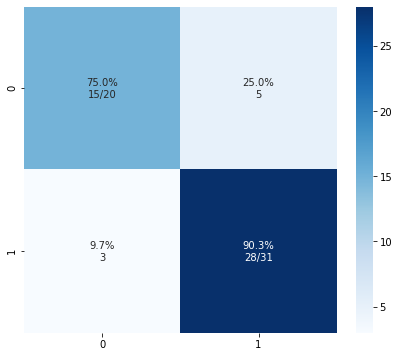

In [18]:
cm_result, cm = cm_analysis(y_test, y_pred, [0,1])

In [19]:
statistics(cm)

True Positives (TP): 28
True Negatives (TN): 15
False Positives (FP): 5
False Negarives (FN): 3
Classification Accuracy: 0.8431372549019608
Precision: 0.75
Recall: 0.9032258064516129
f-score: 0.8195121951219512


# Using k-nearest neighbors (KNN)

In [33]:
k_range = list(range(10,71))
scores = []
scoresd = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    knnd = KNeighborsClassifier(n_neighbors=k,weights='distance')
    knnd.fit(X_train, y_train)
    y_pred = knnd.predict(X_test)
    scoresd.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.plot(k_range, scoresd)
plt.legend(['uniform','distance'])
plt.grid()
plt.title('Relation between K and testing accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

KeyboardInterrupt: 

In [ ]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X,y)
pd_results = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
# just for not showing the table

Finding the best knn model:

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

The highest accuracy is with : n_neighbors=16, weights='distance'

Making the prediction:


In [ ]:
knn = KNeighborsClassifier (n_neighbors=16, weights='distance')
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
label, count = np.unique(np.array(y_pred), return_counts=True)
print(dict(zip(label, count)))
print("Testing Score: ",knn.score(X_test,y_test))
print("Training Score: ",knn.score(X_train, y_train))

### The confusion matrix:

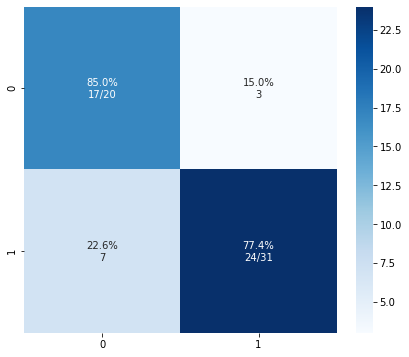

In [21]:
cm_result, cm = cm_analysis(y_test, y_pred, [0,1])

In [22]:
statistics(cm)

True Positives (TP): 24
True Negatives (TN): 17
False Positives (FP): 3
False Negarives (FN): 7
Classification Accuracy: 0.803921568627451
Precision: 0.85
Recall: 0.7741935483870968
f-score: 0.810327706057597


# Using Random Forest model

In [ ]:
d_range = [10,50,100,200,300,400,500]
scores = []
for d in d_range:
    rfc = RandomForestClassifier(n_estimators=d,random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(d_range, scores)
plt.title('Relation between n estimators and testing accuracy')
plt.xlabel('Value of N for Random Forest')
plt.ylabel('Testing Accuracy')

In [ ]:
rfc = RandomForestClassifier(n_estimators =300,random_state=42)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
label, count = np.unique(np.array(y_pred), return_counts=True)
print(dict(zip(label, count)))
print("Testing Score: ",rfc.score(X_test,y_test))
print("Training Score: ",rfc.score(X_train, y_train))

Confusion matrix

In [ ]:
cm_result, cm = cm_analysis(y_test, y_pred, [0,1])

In [ ]:
statistics(cm)

# Using Deep Learning method - CNN

## Part 1 - Data Preprocessing

## Split into train , test data

In [23]:
# train, test split
splitfolders.ratio('./data/brain_tumor_dataset/', output="./data/brain_tumor_dataset_split", ratio=(0.7, 0.3))

Copying files: 253 files [00:00, 808.38 files/s]


### Preprocessing the Training set

In [24]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train = train_datagen.flow_from_directory('./data/brain_tumor_dataset_split/train',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 176 images belonging to 2 classes.


In [25]:
train.class_indices

{'no': 0, 'yes': 1}

In [26]:
yes=np.count_nonzero(train.classes)
print("Yes:",yes)
print("No:",176-yes)

Yes: 108
No: 68


### Preprocessing the Test set

In [27]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test = test_datagen.flow_from_directory('data/brain_tumor_dataset_split/val/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 77 images belonging to 2 classes.


In [28]:
yes_test=np.count_nonzero(test.classes)
print("Yes:",yes_test)
print("No:",77-yes_test)

Yes: 47
No: 30


In [29]:
len(test.classes)

77

TypeError: Invalid shape (57600,) for image data

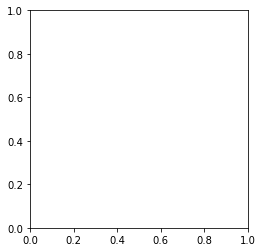

In [30]:
plt.imshow(X_train[0])

https://www.kaggle.com/brendonim/brain-mri-tumor-detection-using-svm

## Part 2 - Building the CNN

In [ ]:
### Init the CNN model
cnn = tf.keras.models.Sequential()

### Convolution and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=7, activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Flattening
cnn.add(tf.keras.layers.Flatten())

### Fully Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Summary of the model

In [ ]:
cnn.summary()

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x = train, epochs = 121 ,validation_data=test)

### Train accuracy

In [ ]:
cnn.evaluate(train)

### Test accuracy 

In [ ]:
cnn.evaluate(test)

## Part 4 - Making single predictions

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image


from IPython.display import display, Image
display(Image(filename='brain_tumor_dataset_splitted1/val/no/46 no.jpg'))
test_image = image.load_img('brain_tumor_dataset_splitted1/val/no/46 no.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0][0] == 1:
  prediction = 'Yes'
else:
  prediction = 'No'

print("Actual: No")
print("Predicted:", prediction)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image


from IPython.display import display, Image
display(Image(filename='brain_tumor_dataset_splitted1/val/yes/Y147.JPG'))
test_image = image.load_img('brain_tumor_dataset_splitted1/val/yes/Y147.JPG', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
train.class_indices
if result[0][0] == 1:
  prediction = 'Yes'
else:
  prediction = 'No'

print("Actual: Yes")
print("Predicted:", prediction)